<h1 style='color:red'> Project 3: Building user-based recommendation model for Amazon</h1>
<h3 style='color:blue'> Ms. Shamali V. Sawant</h3>

<h3 style='color:orange'>DESCRIPTION</h3>

**The dataset provided contains movie reviews given by Amazon customers.**

**Data Dictionary**
* UserID – 4848 customers who provided a rating for each movie
* Movie 1 to Movie 206 – 206 movies for which ratings are provided by 4848 distinct users

**Data Considerations**
- All the users have not watched all the movies and therefore, all movies are not rated. These missing values are represented by NA.
- Ratings are on a scale of 0 to 5 where 0 is the least rating and 5 is the best.

# 1. Import necessary libraries for EDA 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display_html

from math import sqrt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from termcolor import colored
from colored import stylize
from IPython.display import Markdown, display
from IPython.display import HTML

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#define necessary functions
#for customized printing
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))
#define function to plot distribution
def distplot(figRows,figCols,xSize, ySize, data, features, colors, kde=True, bins=None):
    f, axes = plt.subplots(figRows, figCols, figsize=(xSize, ySize))
    
    features = np.array(features).reshape(figRows, figCols)
    colors = np.array(colors).reshape(figRows, figCols)
    
    for row in range(figRows):
        for col in range(figCols):
            if (figRows == 1 and figCols == 1) :
                axesplt = axes
            elif (figRows == 1 and figCols > 1) :
                axesplt = axes[col]
            elif (figRows > 1 and figCols == 1) :
                axesplt = axes[row]
            else:
                axesplt = axes[row][col]
            plot = sns.distplot(data[features[row][col]], color=colors[row][col], bins=bins, ax=axesplt, kde=kde, hist_kws={"edgecolor":"k"})
            plot.set_xlabel(features[row][col],fontsize=20)
            
#define function to display dataframes side by side
def display_side_by_side(args):
    html_str =''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline;margin-left:50px !important;margin-right: 40px !important"'),raw=True)

In [3]:
df = pd.read_csv("Amazon - Movies and TV Ratings.csv")
df.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for i in df.columns[1:]:
    print(df[i].value_counts())

5.0    1
Name: Movie1, dtype: int64
5.0    1
Name: Movie2, dtype: int64
2.0    1
Name: Movie3, dtype: int64
5.0    2
Name: Movie4, dtype: int64
5.0    20
2.0     4
1.0     3
4.0     2
Name: Movie5, dtype: int64
4.0    1
Name: Movie6, dtype: int64
5.0    1
Name: Movie7, dtype: int64
5.0    1
Name: Movie8, dtype: int64
5.0    1
Name: Movie9, dtype: int64
5.0    1
Name: Movie10, dtype: int64
5.0    2
Name: Movie11, dtype: int64
5.0    5
Name: Movie12, dtype: int64
5.0    1
Name: Movie13, dtype: int64
4.0    1
Name: Movie14, dtype: int64
5.0    1
Name: Movie15, dtype: int64
5.0    213
4.0     71
3.0     28
2.0      5
1.0      3
Name: Movie16, dtype: int64
3.0    1
Name: Movie17, dtype: int64
5.0    1
Name: Movie18, dtype: int64
5.0    1
2.0    1
Name: Movie19, dtype: int64
3.0    1
Name: Movie20, dtype: int64
5.0    1
Name: Movie21, dtype: int64
5.0    2
Name: Movie22, dtype: int64
5.0    3
Name: Movie23, dtype: int64
5.0    4
2.0    1
Name: Movie24, dtype: int64
5.0    1
Name: Movie25, dt

In [5]:
df_copy = df.copy()

In [6]:
df2=df_copy.melt(id_vars=['user_id'], 
        var_name="movie_id", 
        value_name="rating")
df2 = df2.sort_values(by=['rating'],ascending=False)
df2.reset_index(inplace=True)
df2.drop('index',axis=1,inplace=True)
df2

,user_id,movie_id,rating
0,A3R5OBKS7OM2IR,Movie1,5.0
1,A1KI6L82M5RAHQ,Movie127,5.0
2,A31FT2I8MLE4EC,Movie127,5.0
3,A34JCDB3DPJ1I5,Movie127,5.0
4,A34I0F2UBJ6YBP,Movie127,5.0
...,...,...,...
998683,A2G3QM6ZLT66HO,Movie206,NaN
998684,A2YSM4732ZHGZB,Movie206,NaN
998685,A1PT4GB3A675ZW,Movie206,NaN
998686,A23E3CUB03Z3YX,Movie206,NaN


# 2. EDA 

In [7]:
groupby_rating = df2.groupby('user_id')['rating']
groupby_rating = pd.DataFrame(groupby_rating.count())

In [8]:
groupby_rating['rating'].max()

6

In [9]:
df2.rating.value_counts()

5.0    3659
4.0     521
1.0     363
3.0     272
2.0     185
Name: rating, dtype: int64

In [10]:
3659+521+363+272+185

5000

# 2.a] Shape of Data 

In [11]:
print("Total Number of Rows:", df2.shape[0])
print('Total Number of Columns:',df2.shape[1])

Total Number of Rows: 998688
Total Number of Columns: 3


# 2.b] Data Type of each attribute 

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998688 entries, 0 to 998687
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   998688 non-null  object 
 1   movie_id  998688 non-null  object 
 2   rating    5000 non-null    float64
dtypes: float64(1), object(2)
memory usage: 22.9+ MB


# 2.c] Check for missing values 

In [13]:
df2.isnull().sum()*100/df2.shape[0]

user_id      0.000000
movie_id     0.000000
rating      99.499343
dtype: float64

**99% of the data contains null values in the rating column. These corresponding to the movies that are not watched by the user. We will relace null values for a particular movie columm by mean of that column**

# 2.d] 5 point summary of numerical data 

In [14]:
df2.rating.describe()

count    5000.000000
mean        4.385600
std         1.199667
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

**Observations**
* min rating is 1 and max is 5 so we have ratings as intergers as 1,2,3,4,5
* mean rating is 4.38565 and 25th percentile is also 4 So, most of the users have rated high for the given movies 

# 2.e] Unique users and products count 

In [15]:
print(colored('Unique number of users:',"blue",attrs=['bold']),df2.user_id.nunique())
print(colored('Unique number of movies:',"blue",attrs=['bold']),df2.movie_id.nunique())

Unique number of users: 4848
Unique number of movies: 206


# 3. Data Analysis and visualization(raw data-with missing values)

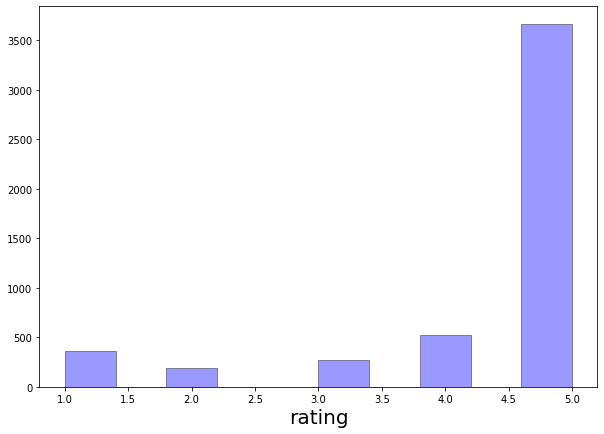

In [100]:
distplot(1,1,10,7,data = df2,features = ['rating'],colors='blue',kde = False,bins=10)

**Observations:**
* Out of total 4848 users around 3500 users rated 5 for the movies
* Count of ratings 1,2,3 and 4 are comparatively less, lesser than 500

# 4. Highly rated movies 

In [17]:
groupby_movie =  df2.groupby('movie_id')['rating']
groupby_movie = pd.DataFrame(groupby_movie.count().clip(upper=50))
groupby_movie.rename(columns={'rating':'rating_count'},inplace=True)

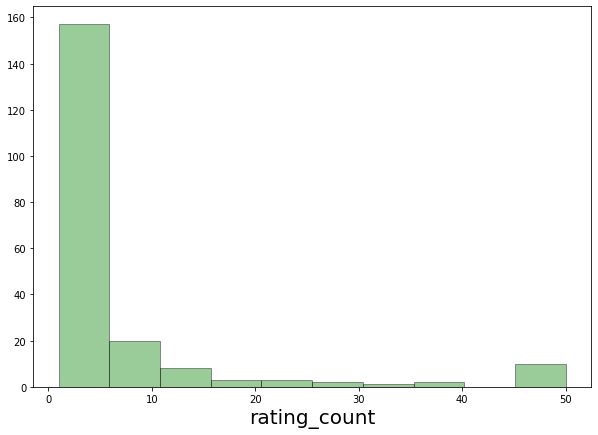

In [99]:
distplot(1,1,10,7,data = groupby_movie,features = ['rating_count'],colors='green',kde = False,bins=10)

**Observations:**
* We clipped the upper limit to 50. So any value above 50 will not be plotted.
* Large number or movies which were rated once and very few rated less than 20 times.

# 5. Top rating count distribution grouped by users 

In [19]:
grouped_ratings_by_users = df2.groupby('user_id')['rating']
grouped_ratings_by_users = pd.DataFrame(grouped_ratings_by_users.count())
grouped_ratings_by_users.rename(columns={'rating':'rating_count'},inplace=True)

Text(0.5, 0, 'Rating_Count')

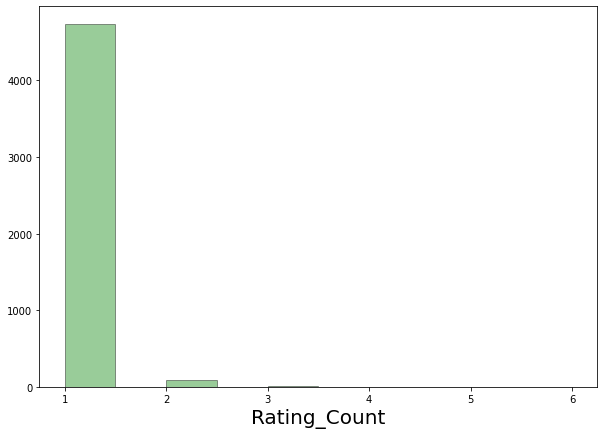

In [97]:
distplot(1,1,10,7,data = grouped_ratings_by_users,features = ['rating_count'],colors='green',kde = False,bins=10)
plt.xlabel('Rating_Count')

**Observations:**
* Out of total 4848 users alomost all the users rated only once and very fer rated twice or thrice
* No user rated the movie more than three times

# 6. Mean rating grouped by movies

In [21]:
mean_rating_groupedby_movies = pd.DataFrame(df2.groupby('movie_id')['rating'].mean())
mean_rating_groupedby_movies.rename(columns={'rating':'Mean_Rating'},inplace=True)

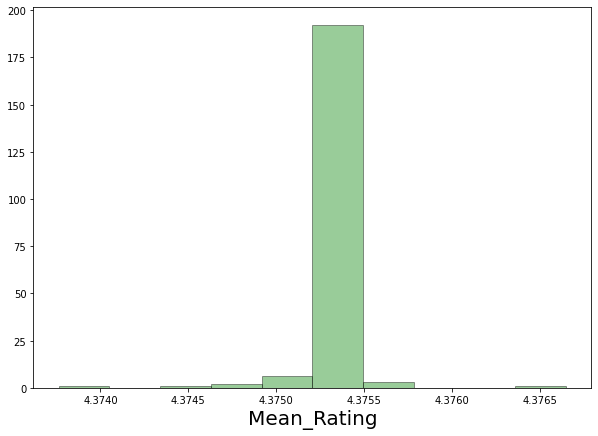

In [96]:
distplot(1,1,10,7,data = mean_rating_groupedby_movies,features = ['Mean_Rating'],colors='green',kde = False,bins=10)

**Observations:**
* Most of the ratings are in the range of 4 to 5. Most of the movies has received a rating of 5.
* This can solve the problem of missing values.

# 7.  Before imputing missing values we will explore more about the data

In [89]:
df_copy.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
# Which movies have maximum views/ratings and which are the top 5 movies with the least audience.
movie_numbers = df_copy.columns[1:]
# Analysis of movies' popularity based on rating count

rating_count ={'Movie':[],'ratingCount':[]}
for i in movie_numbers:
    rating_count['Movie'].append(i)
    rating_count['ratingCount'].append(df_copy[i].count())
rating_count = pd.DataFrame(rating_count)
top_ten_highest_rating=rating_count.sort_values(by=['ratingCount'],ascending=False).head(10)
least_audience = rating_count.sort_values(by=['ratingCount'],ascending = True)
top_five_least_audience = least_audience.head(5)

print(colored('\nTop 10 movies with highest number of views/ratings are:\n','red',attrs=['bold']),
      list(top_ten_highest_rating['Movie']))

print(colored('\nTop 5 movies with least audience are:\n','red',attrs=['bold']),
      list(top_five_least_audience['Movie']))


Top 10 movies with highest number of views/ratings are:
 ['Movie127', 'Movie140', 'Movie16', 'Movie103', 'Movie29', 'Movie91', 'Movie92', 'Movie89', 'Movie158', 'Movie108']

Top 5 movies with least audience are:
 ['Movie1', 'Movie71', 'Movie145', 'Movie69', 'Movie68']


In [93]:
# What is the average rating for each movie? Define the top 5 movies with the maximum ratings.
avg_rating = {'Movie':[],'avgRating':[]}
for i in movie_numbers:
    avg_rating['Movie'].append(i)
    avg_rating['avgRating'].append(round((df_copy[i].mean()),2))
avg_rating = pd.DataFrame(avg_rating)
top_five_highest_avg_rating = avg_rating.sort_values(by=['avgRating'],ascending=False).head()
top_five_highest_avg_rating


print(colored('\nTop 5 movies with highest average rating are:\n','red',attrs=['bold']),
      list(top_five_highest_avg_rating['Movie']))


Top 5 movies with highest average rating are:
 ['Movie1', 'Movie66', 'Movie76', 'Movie75', 'Movie74']


# 8. Missing value imputation 

In [23]:
#Percentage of null values
df2.isnull().sum()*100/df2.shape[0]

user_id      0.000000
movie_id     0.000000
rating      99.499343
dtype: float64

In [24]:
df_copy

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4843,A1IMQ9WMFYKWH5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4844,A1KLIKPUF5E88I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4845,A5HG6WFZLO10D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4846,A3UU690TWXCG1X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [25]:
df_copy.mean(axis=1)

0       5.0
1       2.0
2       5.0
3       5.0
4       5.0
       ... 
4843    5.0
4844    5.0
4845    5.0
4846    5.0
4847    5.0
Length: 4848, dtype: float64

# 9. Replace missing values by mean of all the ratings 

In [26]:
df_clean = df2.fillna(df2['rating'].mean())
df_clean

,user_id,movie_id,rating
0,A3R5OBKS7OM2IR,Movie1,5.0000
1,A1KI6L82M5RAHQ,Movie127,5.0000
2,A31FT2I8MLE4EC,Movie127,5.0000
3,A34JCDB3DPJ1I5,Movie127,5.0000
4,A34I0F2UBJ6YBP,Movie127,5.0000
...,...,...,...
998683,A2G3QM6ZLT66HO,Movie206,4.3856
998684,A2YSM4732ZHGZB,Movie206,4.3856
998685,A1PT4GB3A675ZW,Movie206,4.3856
998686,A23E3CUB03Z3YX,Movie206,4.3856


In [27]:
df_clean.isnull().sum()

user_id     0
movie_id    0
rating      0
dtype: int64

In [28]:
mean_rating_groupedby_movies = pd.DataFrame(df_clean.groupby('movie_id')['rating'].mean())
mean_rating_groupedby_movies.rename(columns={'rating':'Mean_Rating'},inplace=True)

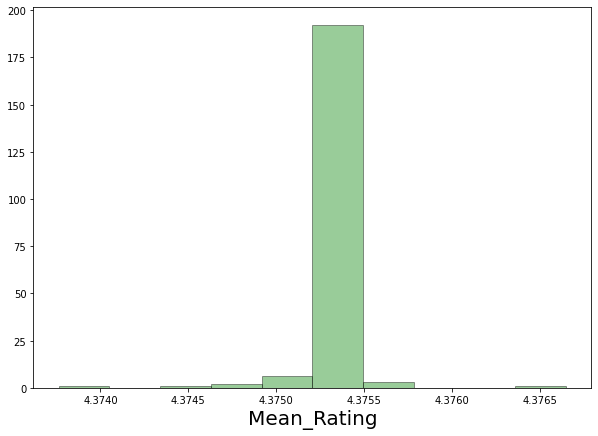

In [98]:
distplot(1,1,10,7,data = mean_rating_groupedby_movies,features = ['Mean_Rating'],colors='green',kde = False,bins=10)

**Imputing missing values with mean of all the ratings has changed the distribution. The distribution after mean imputation is more spiked towards mean.**

# 10. Replace null values by mean for each user(since we are building user based model)

In [30]:
#replace null  by mean for each user
df_transp = df_copy.T

In [31]:
header=df_transp.iloc[0]

In [32]:
df_transp=df_transp[1:]

In [33]:
df_transp.columns=header
df_transp

user_id,A3R5OBKS7OM2IR,AH3QC2PC1VTGP,A3LKP6WPMP9UKX,AVIY68KEPQ5ZD,A1CV1WROP5KTTW,AP57WZ2X4G0AA,A3NMBJ2LCRCATT,A5Y15SAOMX6XA,A3P671HJ32TCSF,A3VCKTRD24BG7K,...,A31KDG42LDKA68,A1ZW2GF8QLTG62,A15W9FRLBUXJNS,AQ4JA4RFC5QHI,A1HY5DOJCVB8MG,A1IMQ9WMFYKWH5,A1KLIKPUF5E88I,A5HG6WFZLO10D,A3UU690TWXCG1X,AI4J762YI6S06
Movie1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Movie2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Movie3,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Movie4,NaN,NaN,5,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Movie5,NaN,NaN,NaN,NaN,5,2,5,2,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Movie202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Movie203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Movie204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Movie205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df_transp_col = df_transp.columns
df_transp_col

Index(['A3R5OBKS7OM2IR', 'AH3QC2PC1VTGP', 'A3LKP6WPMP9UKX', 'AVIY68KEPQ5ZD',
       'A1CV1WROP5KTTW', 'AP57WZ2X4G0AA', 'A3NMBJ2LCRCATT', 'A5Y15SAOMX6XA',
       'A3P671HJ32TCSF', 'A3VCKTRD24BG7K',
       ...
       'A31KDG42LDKA68', 'A1ZW2GF8QLTG62', 'A15W9FRLBUXJNS', 'AQ4JA4RFC5QHI',
       'A1HY5DOJCVB8MG', 'A1IMQ9WMFYKWH5', 'A1KLIKPUF5E88I', 'A5HG6WFZLO10D',
       'A3UU690TWXCG1X', 'AI4J762YI6S06'],
      dtype='object', name='user_id', length=4848)

In [35]:
# to avoid the problem of distorted distribution, we will impute missing values for a particular user by the mean rating 
#of that the users for all the movies
for i in df_transp_col:
    if df_transp[i].isnull().any()==True:
        df_transp[i].fillna(round(df_transp[i].mean()),inplace=True)

In [36]:
df_copy['Movie5'].mean()

4.103448275862069

In [37]:
df_transp.isnull().sum()

user_id
A3R5OBKS7OM2IR    0
AH3QC2PC1VTGP     0
A3LKP6WPMP9UKX    0
AVIY68KEPQ5ZD     0
A1CV1WROP5KTTW    0
                 ..
A1IMQ9WMFYKWH5    0
A1KLIKPUF5E88I    0
A5HG6WFZLO10D     0
A3UU690TWXCG1X    0
AI4J762YI6S06     0
Length: 4848, dtype: int64

**We imputed null values by mean for each user. Now we can go back to the format of original dataset by again taking transpose**

In [38]:
df_final = df_transp.T
df_final.reset_index(inplace=True)

In [39]:
df_final.columns

Index(['user_id', 'Movie1', 'Movie2', 'Movie3', 'Movie4', 'Movie5', 'Movie6',
       'Movie7', 'Movie8', 'Movie9',
       ...
       'Movie197', 'Movie198', 'Movie199', 'Movie200', 'Movie201', 'Movie202',
       'Movie203', 'Movie204', 'Movie205', 'Movie206'],
      dtype='object', length=207)

In [41]:
data=df_final.melt(id_vars=['user_id'], 
        var_name="movie_id", 
        value_name="rating")
data = data.sort_values(by=['rating'],ascending=False)
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)
data

,user_id,movie_id,rating
0,A3R5OBKS7OM2IR,Movie1,5.0
1,A353JUUZ4XIYJ0,Movie127,5.0
2,A309WHV3B2V81P,Movie127,5.0
3,A1R2URG8OHNEDS,Movie127,5.0
4,A30N8GNYLI954,Movie127,5.0
...,...,...,...
998683,A3CHMPBVLG1H7W,Movie21,1.0
998684,A13483LW6X9SX8,Movie178,1.0
998685,A2ECR5R2LV0F0V,Movie178,1.0
998686,A1GCIOKPZKFGWN,Movie61,1.0


In [42]:
data.rating.value_counts()

5.0    725550
4.0    107300
1.0     73752
3.0     54591
2.0     37495
Name: rating, dtype: int64

In [50]:
data['rating'].groupby(data['movie_id']).mean()

movie_id
Movie1      4.375206
Movie10     4.375206
Movie100    4.375206
Movie101    4.375206
Movie102    4.375206
              ...   
Movie95     4.375206
Movie96     4.375206
Movie97     4.375206
Movie98     4.375206
Movie99     4.375206
Name: rating, Length: 206, dtype: float64

In [51]:
df2['rating'].groupby(df2['movie_id']).mean()

movie_id
Movie1      5.000000
Movie10     5.000000
Movie100    4.000000
Movie101    5.000000
Movie102    4.000000
              ...   
Movie95     3.333333
Movie96     5.000000
Movie97     4.800000
Movie98     5.000000
Movie99     4.000000
Name: rating, Length: 206, dtype: float64

In [52]:
data.rating.value_counts()

5.0    725550
4.0    107300
1.0     73752
3.0     54591
2.0     37495
Name: rating, dtype: int64

# 11.  Mean rating distribution by users

In [53]:
mean_rating_groupedby_users = pd.DataFrame(data.groupby('user_id')['rating'].mean())
mean_rating_groupedby_users.rename(columns={'rating':'Mean_Rating'},inplace=True)

<Figure size 576x576 with 0 Axes>

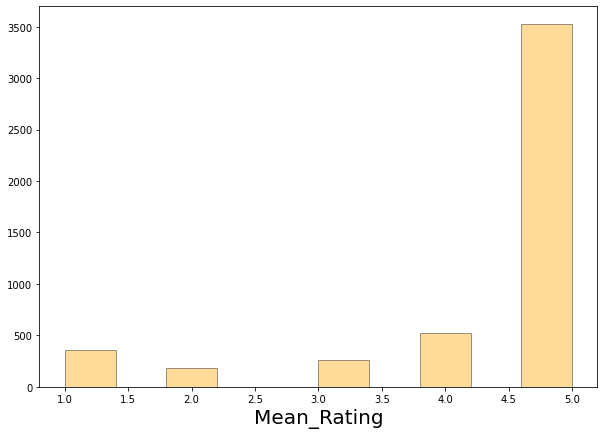

In [54]:
plt.figure(figsize=(8,8))
distplot(1,1,10,7,data = mean_rating_groupedby_users,features = ['Mean_Rating'],colors='orange',kde = False,bins=10)

**Observations:**
* This is the graph of mean ratings grouped by users
* It shows that around 3.5K users have rated 5 stars to the movies. 

# 12.  Mean rating distribution by movies

In [55]:
mean_rating_groupedby_movies = pd.DataFrame(data.groupby('movie_id')['rating'].mean())
mean_rating_groupedby_movies.rename(columns={'rating':'Mean_Rating'},inplace=True)

<Figure size 576x576 with 0 Axes>

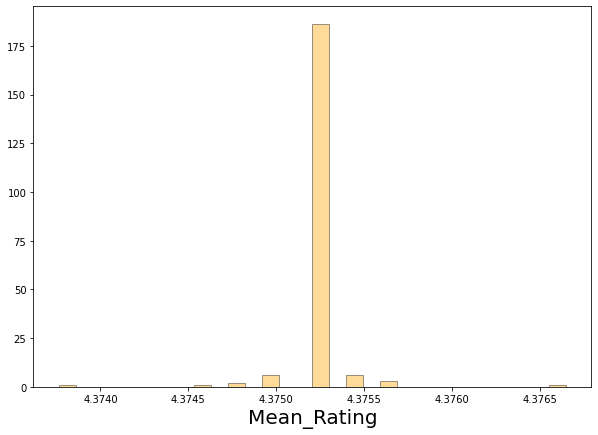

In [56]:
plt.figure(figsize=(8,8))
distplot(1,1,10,7,data = mean_rating_groupedby_movies,features = ['Mean_Rating'],colors='orange',kde = False,bins=30)

**Observations:**
* This is the mean rating grouped by movies 
* Many movies are given ratings around 4.375

# 13.  Split the data into train and test set in the ratio of 70:30 

In [57]:
seed = 2021

In [58]:
train_data,test_data = train_test_split(data,test_size=0.3,random_state = seed)

In [59]:
# Shape of train and test data
print("Train data has",train_data.shape[0],"rows and",train_data.shape[1],"columns")
print("Test data has",test_data.shape[0],"rows and",test_data.shape[1],"columns")

Train data has 699081 rows and 3 columns
Test data has 299607 rows and 3 columns


In [60]:
test_data.head()

,user_id,movie_id,rating
144377,A1KNQ4XBLAP3QY,Movie88,5.0
644828,A15HTLHQSQRDHJ,Movie78,5.0
74248,A245YDUYUOMRP7,Movie143,5.0
988119,A1GCIOKPZKFGWN,Movie52,1.0
710658,A2PAAM6ILGBAKM,Movie87,5.0


# 14. Recommender Systems 

## 1. Popularity based 

Popularity based recommender system will recommend the items(movies) that are currently trending based on other users' ratings. So, if a movie is rated highly by large number of users, then there is good amount of possibility that the targeted user will also like it. 
This is not a personalized recommender system and these movies can be recommended to any user. This can solve the problem of cold start.

In [61]:
class popularity_based_recom_model():
    def __init__(self,train_data,test_data,user_id,movie_id):
        self.train_data = train_data
        self.test_data = test_data
        self.user_id = user_id
        self.movie_id = movie_id
    
    
    def fit(self):
        
        #get count of users for each unique movie as a recommendation score
        train_data_grouped = train_data.groupby(['movie_id']).agg({self.user_id:'count'}).reset_index()
        train_data_grouped.rename(columns={'user_id':'score'},inplace=True)

        #sort the movies based on recommendation score
        train_data_sorted = train_data_grouped.sort_values(by='score',ascending=False)

        #generate recommendation rank based on score
        train_data_sorted['Rank'] = train_data_grouped['score'].rank(ascending=False,method = 'first')

        #get top 10 recommendations
        self.popularity_recom = train_data_sorted.head(20)
    
    #make recommendation based on popularity based
    def recommend(self,user_id,n=5):
        user_recommendations = self.popularity_recom
        
        # filter the movies that are not rated by the user
        movies_already_rated_by_user = self.train_data[self.train_data[self.user_id]== user_id][self.movie_id]
        
        user_recommendations = user_recommendations[~user_recommendations[self.movie_id].isin(movies_already_rated_by_user)]
        
        #add user_id column for which recommendations are being generated
        user_recommendations['user_id']=user_id
        
        #bring id column to first
        cols = user_recommendations.columns.tolist()
        cols = cols[-1:]+cols[:-1]
        
        user_recommendations = user_recommendations[cols].head(n)
        
        self.plot(user_recommendations)
        
        return user_recommendations
    
    #plot the rank and score for visual understnding
    def plot(self,user_recommendations):
        f,axes = plt.subplots(1,2,figsize=(20,8))
        plt1 = sns.barplot(x = 'Rank',y = 'score', data = user_recommendations,hue = 'Rank',ax = axes[0])
        plt1.set_xlabel('Rank',fontsize = 20)
        plt1.set_ylabel('Score',fontsize = 20)
        
        plt2 = sns.pointplot(x = 'Rank',y = 'score', data = user_recommendations,hue = 'Rank',ax = axes[1])
        plt2.set_xlabel('Rank',fontsize = 20)
        plt2.set_ylabel('Score',fontsize = 20)
        
    #evaluate the model
    def evaluate(self):
        ratings = self.train_data.groupby(self.movie_id)['rating'].mean()
        
        pred_rating =[]
        for data in self.test_data.values:
            if data[1] in (ratings.index):
                pred_rating.append(ratings.loc[data[1]])
            else:
                pred_rating.append(0)
        
        mse = mean_squared_error(self.test_data['rating'],pred_rating)
        rmse = sqrt(mse)
        return rmse

## 1.a] Initialize

In [62]:
pr = popularity_based_recom_model(train_data = train_data,test_data = test_data,user_id = 'user_id',movie_id = 'movie_id')

## 1.b] Fit 

In [63]:
pr.fit()

## 1.c] Recommend 

In [64]:
test_data.tail()

,user_id,movie_id,rating
336163,AKIYVW71DN9EB,Movie159,5.0
410312,A1E7RPUT3P1PY,Movie168,5.0
646047,A1D2WZ8E9LSOU5,Movie64,5.0
162332,A172UZKI33ZC1E,Movie113,5.0
353980,A2I2SZ5KFIW4OB,Movie148,5.0


In [65]:
train_data.head()

,user_id,movie_id,rating
49092,A3LZBOBV9H1HDV,Movie121,5.0
503316,A3RHU9SWJOLZ90,Movie43,5.0
104814,A2JXE9N85QJ86U,Movie137,5.0
231660,A1MRG0R8AJARYT,Movie188,5.0
62118,AKMMCNA8BDB5C,Movie140,5.0


## 1.d]  Try with three differernt users

,user_id,movie_id,score,Rank
163,A3LZBOBV9H1HDV,Movie60,3452,4.0
60,A3LZBOBV9H1HDV,Movie153,3445,7.0
162,A3LZBOBV9H1HDV,Movie6,3438,12.0
84,A3LZBOBV9H1HDV,Movie175,3435,14.0
45,A3LZBOBV9H1HDV,Movie14,3434,15.0


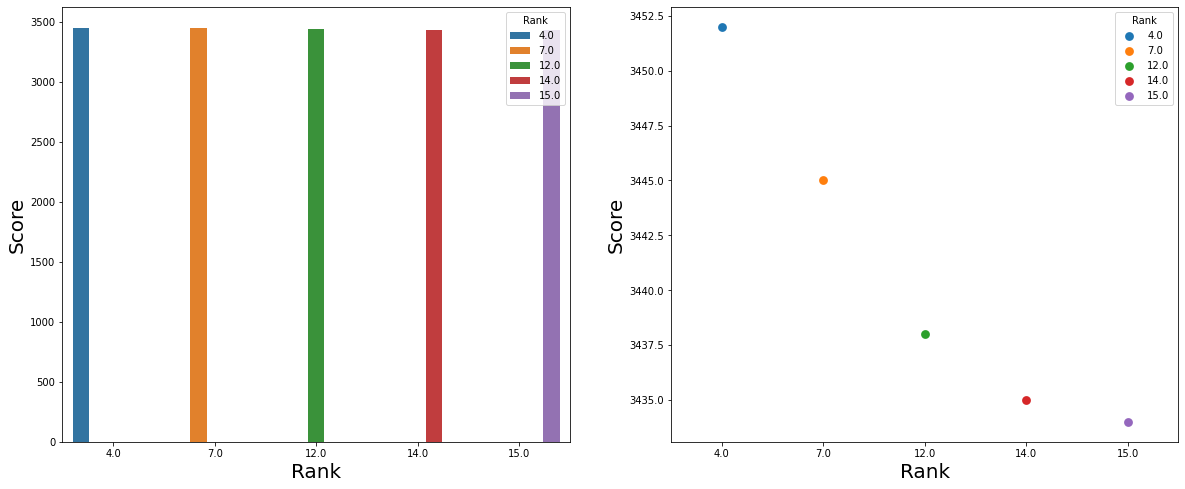

In [66]:
user_0 = pr.recommend('A3LZBOBV9H1HDV')
user_0

,user_id,movie_id,score,Rank
143,A245YDUYUOMRP7,Movie42,3446,6.0
110,A245YDUYUOMRP7,Movie199,3438,11.0
162,A245YDUYUOMRP7,Movie6,3438,12.0
203,A245YDUYUOMRP7,Movie97,3433,17.0
30,A245YDUYUOMRP7,Movie126,3431,19.0


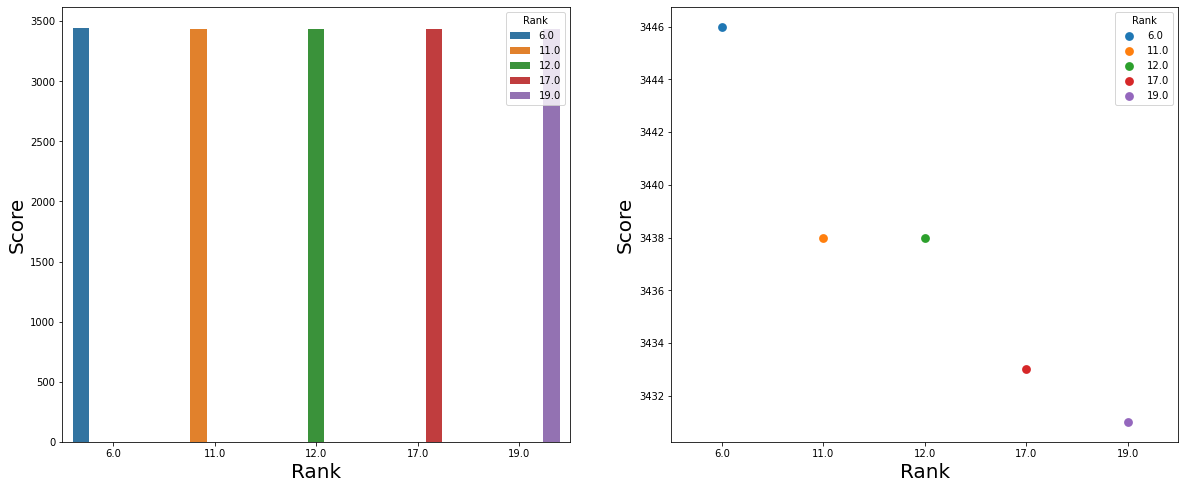

In [67]:
user_1 = pr.recommend('A245YDUYUOMRP7')
user_1

,user_id,movie_id,score,Rank
182,A1D2WZ8E9LSOU5,Movie78,3474,1.0
163,A1D2WZ8E9LSOU5,Movie60,3452,4.0
142,A1D2WZ8E9LSOU5,Movie41,3452,3.0
23,A1D2WZ8E9LSOU5,Movie12,3442,8.0
40,A1D2WZ8E9LSOU5,Movie135,3438,10.0


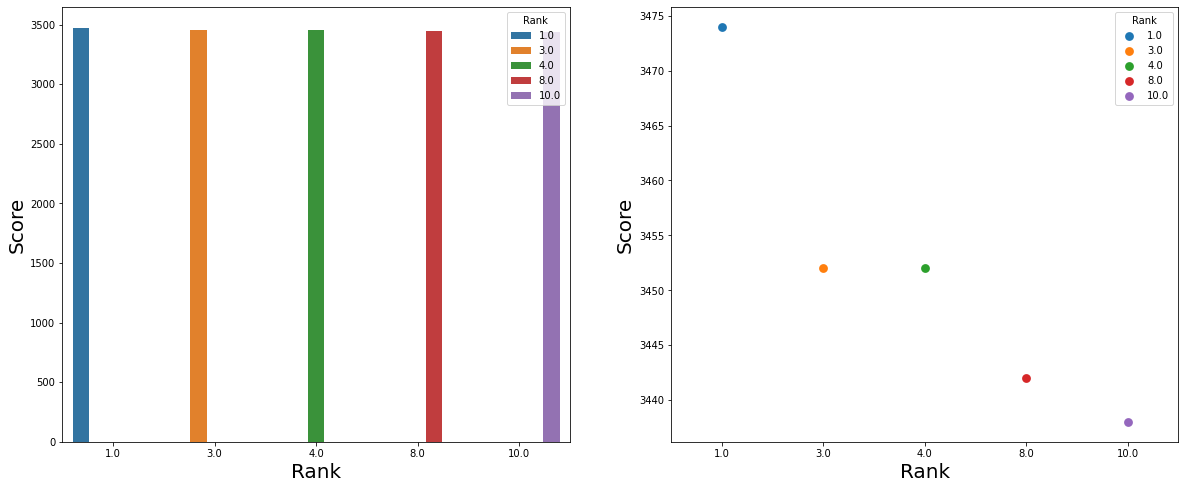

In [68]:
user_2 = pr.recommend('A1D2WZ8E9LSOU5')
user_2

,user_id,movie_id,score,Rank
142,A2I2SZ5KFIW4OB,Movie41,3452,3.0
137,A2I2SZ5KFIW4OB,Movie37,3446,5.0
23,A2I2SZ5KFIW4OB,Movie12,3442,8.0
171,A2I2SZ5KFIW4OB,Movie68,3442,9.0
110,A2I2SZ5KFIW4OB,Movie199,3438,11.0


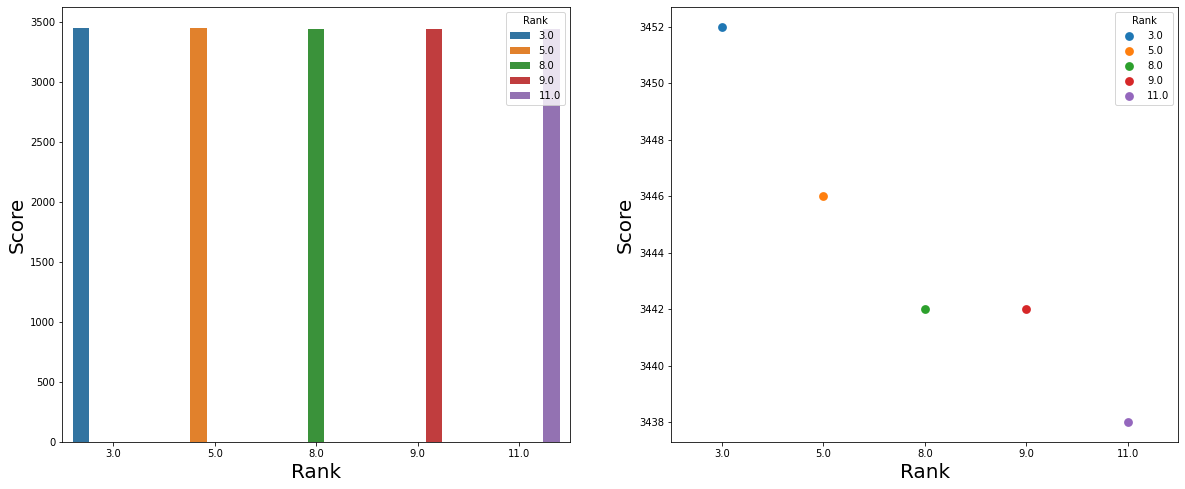

In [69]:
user_3 = pr.recommend('A2I2SZ5KFIW4OB')
user_3

In [70]:
display_side_by_side([user_1,user_2,user_3])

,user_id,movie_id,score,Rank
143,A245YDUYUOMRP7,Movie42,3446,6.0
110,A245YDUYUOMRP7,Movie199,3438,11.0
162,A245YDUYUOMRP7,Movie6,3438,12.0
203,A245YDUYUOMRP7,Movie97,3433,17.0
30,A245YDUYUOMRP7,Movie126,3431,19.0
,user_id,movie_id,score,Rank
182,A1D2WZ8E9LSOU5,Movie78,3474,1.0
163,A1D2WZ8E9LSOU5,Movie60,3452,4.0
142,A1D2WZ8E9LSOU5,Movie41,3452,3.0
23,A1D2WZ8E9LSOU5,Movie12,3442,8.0


In [71]:
pr.evaluate()

1.2043314629797393

**Observation:**
* The ppopularity based moel is predicting the movies that are trending among all the users.
* The movies that are trending but are also rated by the user previously are excluded from the new recommenations.
* Taking into account above point, the recommendations are more or less same for all the users

## 2. Collaborative filtering model using surprise library 

## 2.a]  Import the necessary libraries 

In [72]:
from surprise.dataset import Dataset
from surprise.reader import Reader

from surprise.model_selection import train_test_split

from collections import defaultdict

from surprise import SVD 
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import RandomizedSearchCV
reader = Reader()
surprise_dataset = Dataset.load_from_df(data,reader)

## 2.b]  Split dataset into train and test in the ratio of 70 and 30

In [73]:
trainset,testset = train_test_split(surprise_dataset,test_size = 0.3, random_state = seed)

In [74]:
def get_top_n(predictions , n = 10):
    #Map predictions to user
    top_n = defaultdict(list)
    for uid,iid,true_r,est,_ in predictions:
        top_n[uid].append((iid,est))
        
    # sort the ratings
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key = lambda x:x[1],reverse=True)
        top_n[uid] = user_ratings[:n]
    
    return top_n

In [75]:
class collaborative_filtering():
    def __init__(self,model,trainset,testset,data):
        self.trainset = trainset
        self.testset = testset
        self.model = model
        self.data = data
        self.pred_test = None
        self.recommendations = None
        self.top_n = None
        self.recommenddf = None
        
    def fit_and_predict(self):
        printmd("**Fitting the train data...**",color = 'brown')
        self.model.fit(self.trainset)
        
        printmd("**Predicting the test data...**",color = 'brown')
        self.pred_test = self.model.test(self.testset)
        
        rmse = round(accuracy.rmse(self.pred_test),3)
        printmd("**RMSE for the predictions made on test data is" + str(rmse) + '**',color = 'brown')
        
        self.top_n = get_top_n(self.pred_test)
        self.recommenddf = pd.DataFrame(columns = ['User_id','Movie_id','Rating'])
        
        for items in self.top_n:
            subdf = pd.DataFrame(self.top_n[items],columns = ['Movie_id','Rating'])
            subdf['User_id'] = items
            
            cols = subdf.columns.tolist()
            cols = cols [-1:] + cols [ :-1]
            subdf = subdf [cols]
            self.recommenddf = pd.concat([self.recommenddf,subdf],axis =0)
        return rmse

    def cross_validate(self):
        printmd("**Cross validating the data...**",color = 'brown')
        cv_result = cross_validate(self.model,self.data,n_jobs = -1)
        cv_result = round(cv_result['test_rmse'].mean(),3)
        
        printmd("**Mean CV RMSE is"+str(cv_result)+'**',color = 'brown')
        return cv_result
    
    def recommend(self,user_id,n=5):
        printmd("**Recommending top"+str(n)+"mocies for a user_id"+str(user_id)+'...''**',color='brown')
        
        df = self.recommenddf[self.recommenddf['User_id']==user_id].head(n)
        display(df)
        return df

In [76]:
def find_best_model(model,parameters,data):
    clf = RandomizedSearchCV(model,parameters,n_jobs = -1,measures = ['rmse'])
    clf.fit(data)
    print(clf.best_score)
    print(clf.best_params)
    print(clf.best_estimator)
    return clf

**User-based collaborative filtering:**

To find the rating that a user can give to a particular movie, the approach used in user-based collaborative filtering is
1. Find users similiar to the targeted user
2. Find the rating that a targeted user will give based on the ratings of the similar users

## 2.c] KNNWithMeans Model 

### 2.c.1] Find optimal model based on RandomizedSearchCV**

In [82]:
sim_options = {
    'name':['msd','cosine','pearson','pearson_baseline'],
    'support':[8,9,10],
    'user_based':[True]
}
params = {'k':range(32,40,1), 'sim_options':sim_options}
clf = find_best_model(KNNWithMeans,params,surprise_dataset)

{'rmse': 0.008318969895771234}
{'rmse': {'k': 33, 'sim_options': {'name': 'cosine', 'support': 8, 'user_based': True}}}
{'rmse': <surprise.prediction_algorithms.knns.KNNWithMeans object at 0x0000024D30128C88>}


### 2.c.2] Initialize

In [83]:
knnwithmeans = clf.best_estimator['rmse']
col_fil_knnwithmeans = collaborative_filtering(knnwithmeans,trainset,testset,surprise_dataset)

### 2.c.3]  Fit and Predict

In [84]:
knnwithmean_rmse = col_fil_knnwithmeans.fit_and_predict()

<span style='color:brown'>**Fitting the train data...**</span>

Computing the cosine similarity matrix...
Done computing similarity matrix.


<span style='color:brown'>**Predicting the test data...**</span>

RMSE: 0.0099


<span style='color:brown'>**RMSE for the predictions made on test data is0.01**</span>

### 2.c.4] Cross Validate

In [85]:
knnwithmeans_cv_rmse = col_fil_knnwithmeans.cross_validate()

<span style='color:brown'>**Cross validating the data...**</span>

<span style='color:brown'>**Mean CV RMSE is0.008**</span>

### 2.c.5]  Recommend

In [88]:
# We will consider same users in test set to get the recommendations from different models
user_0 = col_fil_knnwithmeans.recommend(user_id ='A3LZBOBV9H1HDV',n=5)
user_1 = col_fil_knnwithmeans.recommend(user_id ='A245YDUYUOMRP7',n=5)
user_2 = col_fil_knnwithmeans.recommend(user_id ='A1D2WZ8E9LSOU5',n=5)
user_3 = col_fil_knnwithmeans.recommend(user_id ='A2I2SZ5KFIW4OB',n=5)

<span style='color:brown'>**Recommending top5mocies for a user_idA3LZBOBV9H1HDV...**</span>

,User_id,Movie_id,Rating
0,A3LZBOBV9H1HDV,Movie192,5
1,A3LZBOBV9H1HDV,Movie104,5
2,A3LZBOBV9H1HDV,Movie59,5
3,A3LZBOBV9H1HDV,Movie169,5
4,A3LZBOBV9H1HDV,Movie45,5


<span style='color:brown'>**Recommending top5mocies for a user_idA245YDUYUOMRP7...**</span>

,User_id,Movie_id,Rating
0,A245YDUYUOMRP7,Movie167,5
1,A245YDUYUOMRP7,Movie70,5
2,A245YDUYUOMRP7,Movie67,5
3,A245YDUYUOMRP7,Movie154,5
4,A245YDUYUOMRP7,Movie192,5


<span style='color:brown'>**Recommending top5mocies for a user_idA1D2WZ8E9LSOU5...**</span>

,User_id,Movie_id,Rating
0,A1D2WZ8E9LSOU5,Movie136,5
1,A1D2WZ8E9LSOU5,Movie182,5
2,A1D2WZ8E9LSOU5,Movie206,5
3,A1D2WZ8E9LSOU5,Movie160,5
4,A1D2WZ8E9LSOU5,Movie126,5


<span style='color:brown'>**Recommending top5mocies for a user_idA2I2SZ5KFIW4OB...**</span>

,User_id,Movie_id,Rating
0,A2I2SZ5KFIW4OB,Movie29,5
1,A2I2SZ5KFIW4OB,Movie28,5
2,A2I2SZ5KFIW4OB,Movie17,5
3,A2I2SZ5KFIW4OB,Movie90,5
4,A2I2SZ5KFIW4OB,Movie35,5


**Observations:**
* Using KNNWithMeans model we get RMSE of 0.0099 and cross validated RMSE of 0.008 
* The recommendations are different for different users based on the similar users of the targeted user.
* KNNWithMeans model uses cosine similarity to find the similar neighbours.

## 2.d] SVD 

The **Singular-Value Decomposition**, or SVD for short, is a matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations simpler. It provides another way to factorize a matrix, into singular vectors and singular values.

A=U.Sigma.transpose(V)

### 2.d.1] Find optimized model using randomized searchcv 

In [77]:
'''
n_epochs – The number of iteration of the SGD procedure. Default is 20.
lr_all – The learning rate for all parameters. Default is 0.005.
reg_all – The regularization term for all parameters. Default is 0.02.
'''
params = {
    'n_epochs':[5,10,15,20],
    'lr_all':[0.002, 0.005],
    'reg_all':[0.4,0.6]
}

clf = find_best_model(SVD,params,surprise_dataset)

{'rmse': 0.34513678562039657}
{'rmse': {'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}}
{'rmse': <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x0000024D26577F48>}


### 2.d.2] Initialize

In [78]:
svd = clf.best_estimator['rmse']
col_fil_svd = collaborative_filtering(svd,trainset,testset,surprise_dataset)

### 2.d.3] Fit and Predict

In [79]:
svd_rmse = col_fil_svd.fit_and_predict()

<span style='color:brown'>**Fitting the train data...**</span>

<span style='color:brown'>**Predicting the test data...**</span>

RMSE: 0.3454


<span style='color:brown'>**RMSE for the predictions made on test data is0.345**</span>

### 2.d.4]  Cross Validate 

In [80]:
svd_cv_rmse = col_fil_svd.cross_validate()

<span style='color:brown'>**Cross validating the data...**</span>

<span style='color:brown'>**Mean CV RMSE is0.345**</span>

### 2.d.5] Recommend

In [81]:
user_0 = col_fil_svd.recommend(user_id = 'A3LZBOBV9H1HDV',n=5)
user_1 = col_fil_svd.recommend(user_id = 'A245YDUYUOMRP7',n=5)
user_2 = col_fil_svd.recommend(user_id = 'A1D2WZ8E9LSOU5',n=5)
user_3 = col_fil_svd.recommend(user_id = 'A2I2SZ5KFIW4OB',n=5)

<span style='color:brown'>**Recommending top5mocies for a user_idA3LZBOBV9H1HDV...**</span>

,User_id,Movie_id,Rating
0,A3LZBOBV9H1HDV,Movie204,4.829526
1,A3LZBOBV9H1HDV,Movie62,4.822883
2,A3LZBOBV9H1HDV,Movie12,4.820105
3,A3LZBOBV9H1HDV,Movie89,4.816093
4,A3LZBOBV9H1HDV,Movie182,4.815461


<span style='color:brown'>**Recommending top5mocies for a user_idA245YDUYUOMRP7...**</span>

,User_id,Movie_id,Rating
0,A245YDUYUOMRP7,Movie62,4.834612
1,A245YDUYUOMRP7,Movie138,4.834375
2,A245YDUYUOMRP7,Movie31,4.829687
3,A245YDUYUOMRP7,Movie197,4.829591
4,A245YDUYUOMRP7,Movie134,4.828410


<span style='color:brown'>**Recommending top5mocies for a user_idA1D2WZ8E9LSOU5...**</span>

,User_id,Movie_id,Rating
0,A1D2WZ8E9LSOU5,Movie160,4.843256
1,A1D2WZ8E9LSOU5,Movie204,4.841813
2,A1D2WZ8E9LSOU5,Movie174,4.831903
3,A1D2WZ8E9LSOU5,Movie172,4.830564
4,A1D2WZ8E9LSOU5,Movie158,4.830406


<span style='color:brown'>**Recommending top5mocies for a user_idA2I2SZ5KFIW4OB...**</span>

,User_id,Movie_id,Rating
0,A2I2SZ5KFIW4OB,Movie160,4.829701
1,A2I2SZ5KFIW4OB,Movie137,4.825465
2,A2I2SZ5KFIW4OB,Movie162,4.818420
3,A2I2SZ5KFIW4OB,Movie158,4.816845
4,A2I2SZ5KFIW4OB,Movie188,4.816282


**Observations:**
* Using SVD we got the RMSE of 0.3454 and cross validated RMSE of 0.345.
* The recommendations are different for different users as they are infered by filling out missing entries in the matrix during matrix factorization using SVD.

**Conclusion:**
* In conclusion we performed EDA on the data given.
* We build popularity based recommendation model, collaborative filtering model using KNNWithMeans Model and SVD and we got good RMSE, which indicates that these recommendations, if made, will be useful for the customers.

<h1 style='color:Purple'>Thank you..!</h1>